In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_context(font_scale=1.5)

df = pd.read_csv('../data.csv')
print('Amostras: {} \nColunas: {}'.format(df.shape[0], df.shape[1]))

In [90]:
phase_cols = [col for col in df.columns if 'phase' in col]
df = df[list(set().union(['severidade', 'rotacao_calc', 'condicao'], phase_cols))]
df.head()

,tg2_phase,tg1_phase,rotacao_calc,rad2_phase,rad1_phase,condicao,ax1_phase,ax2_phase,severidade
0,0.088716,1.412233,12.0,0.800194,1.194332,horizontal-misalignment,1.395359,0.384207,0.5
1,0.072926,1.538576,13.2,0.435814,1.588248,horizontal-misalignment,1.425566,0.310490,0.5
2,0.063044,1.151517,14.2,0.417754,1.199344,horizontal-misalignment,1.401096,0.302284,0.5
3,0.221532,1.360171,15.0,0.596626,1.013469,horizontal-misalignment,1.378789,0.461306,0.5
4,0.213993,-2.899924,16.0,0.504448,1.146666,horizontal-misalignment,1.395547,0.402701,0.5


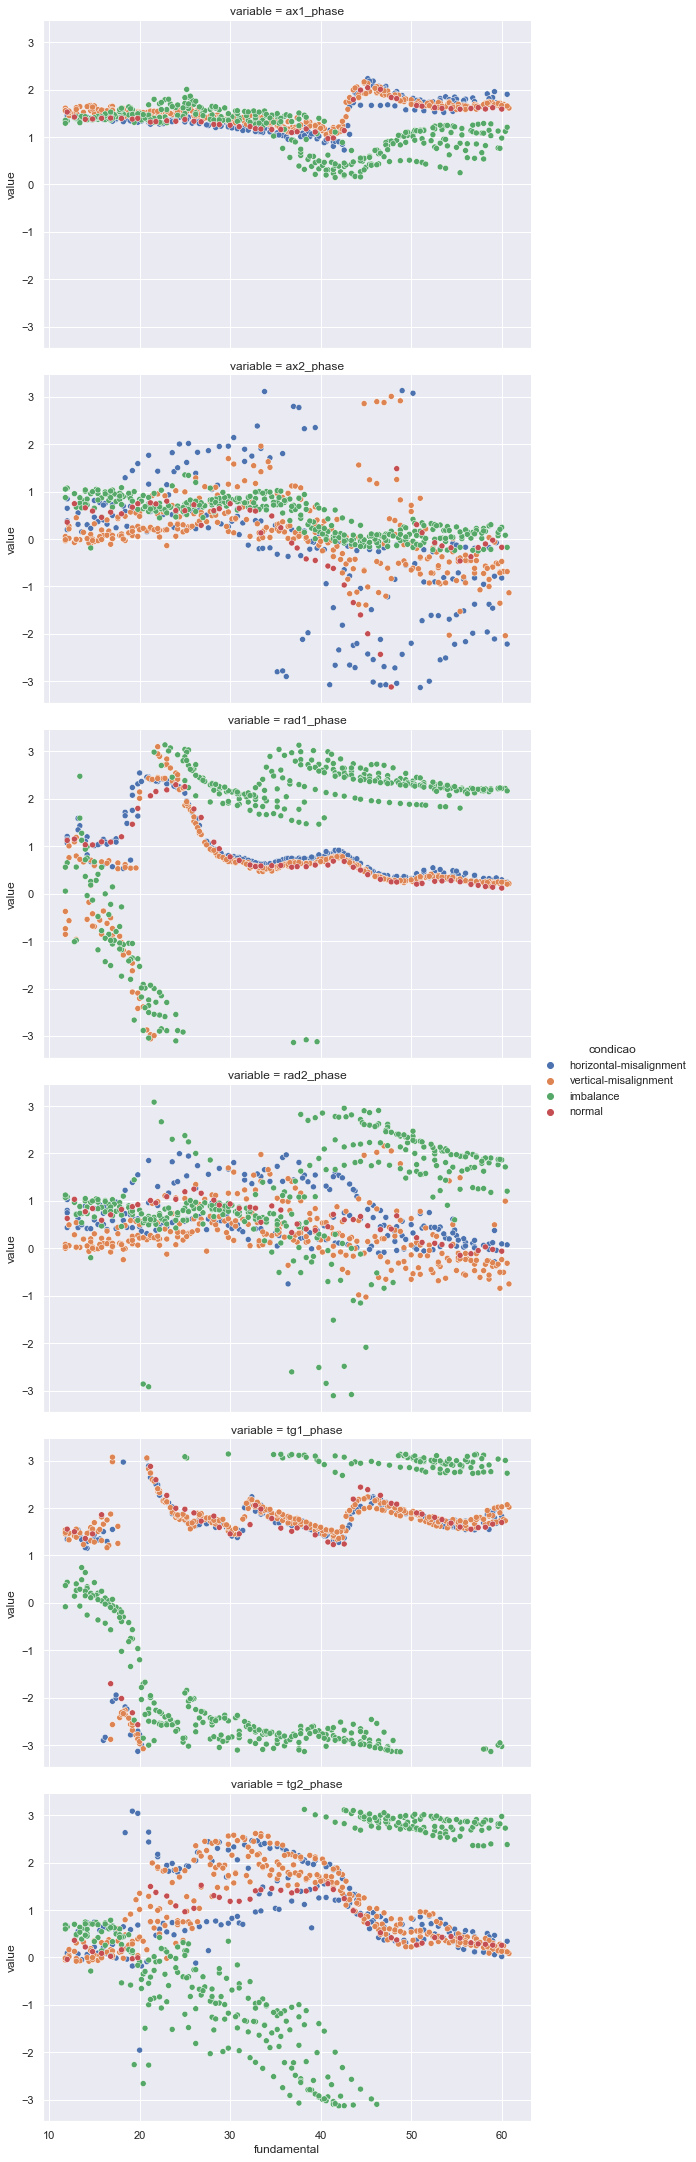

In [101]:
df_melted = df.melt(id_vars=['rotacao_calc', 'condicao'], value_vars=phase_cols)
sns.relplot(data=df_melted, row='variable', y='value', x='rotacao_calc', hue='condicao', aspect=1.5)

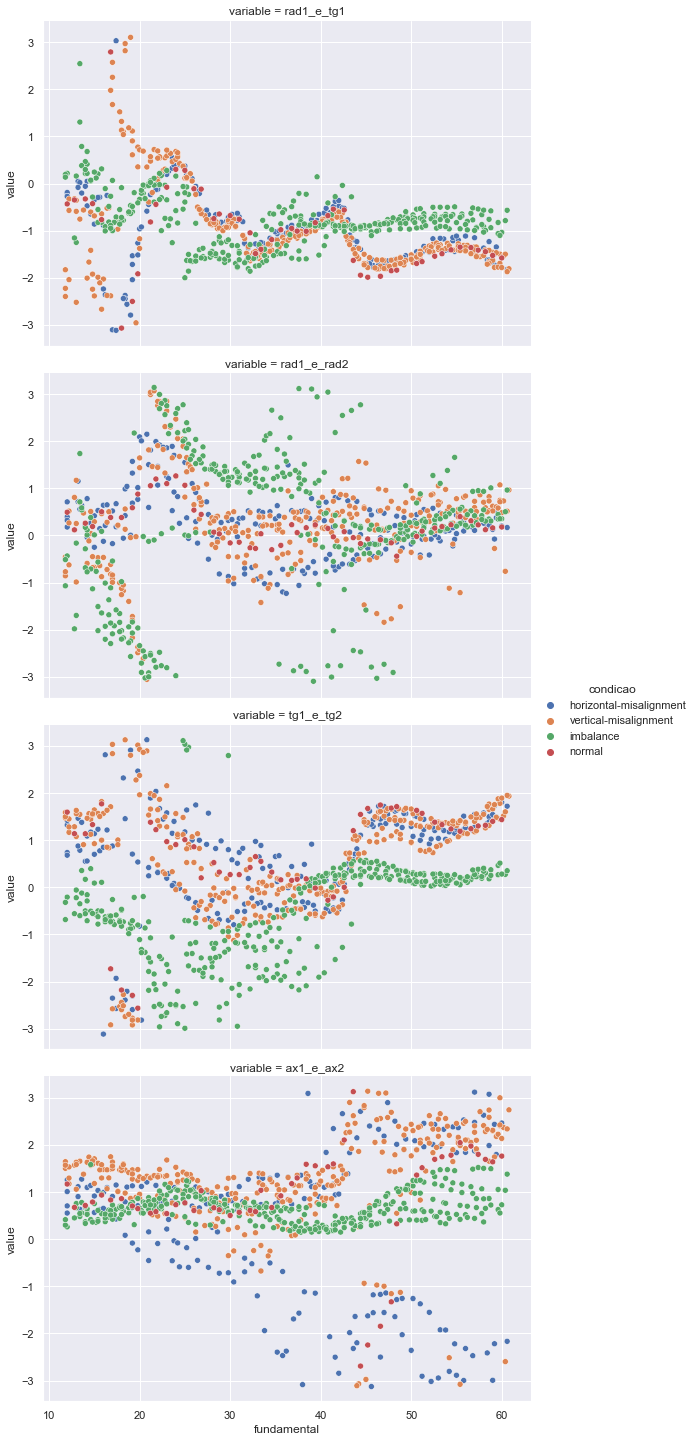

In [98]:
df['rad1_e_tg1'] = (df['rad1_phase'] - df['tg1_phase'] + np.pi)  % (2*np.pi) - np.pi
df['rad1_e_rad2'] = (df['rad1_phase'] - df['rad2_phase'] + np.pi)  % (2*np.pi) - np.pi
df['tg1_e_tg2'] = (df['tg1_phase'] - df['tg2_phase'] + np.pi)  % (2*np.pi) - np.pi
df['ax1_e_ax2'] = (df['ax1_phase'] - df['ax2_phase'] + np.pi)  % (2*np.pi) - np.pi

df_melted = df.melt(id_vars=['rotacao_calc', 'condicao'], value_vars=['rad1_e_tg1', 'rad1_e_rad2', 'tg1_e_tg2', 'ax1_e_ax2'])

sns.relplot(data=df_melted, row='variable', y='value', x='rotacao_calc', hue='condicao', aspect=1.5)

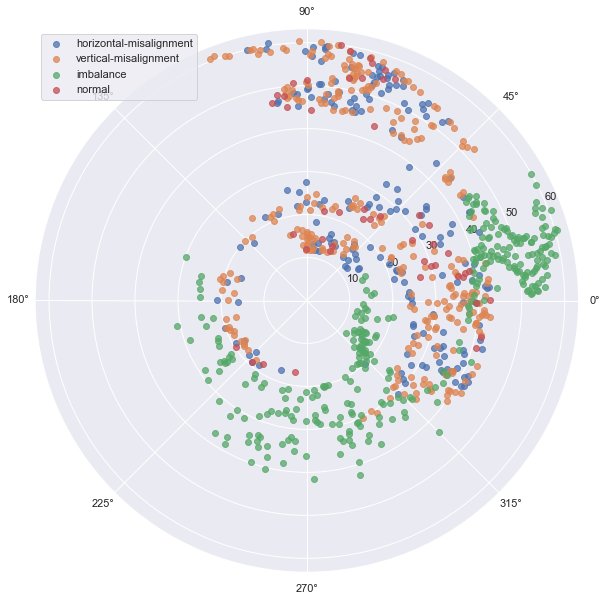

In [100]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(projection='polar')

for condicao in df['condicao'].unique():
    df_cond = df.query(f"condicao == '{condicao}'")
    c = ax.scatter(df_cond['tg1_e_tg2'], df_cond['rotacao_calc'], alpha=0.75, label=condicao)
ax.legend()